# Notes on Wireless Communication and Signal Processing


## 1. Wireless channel models:


### (1) The additive noise channel:
$$r(t)=s(t)+n(t).$$
When the signal undergoes attenuation in transmission through the channel, the received signal is:
$$r(t)=\alpha s(t)+n(t),$$
where $\alpha$ is the attenuation factor.
![additiveChannel.png](figures/notes/wireless/additiveChannel.png "Additive channel model") 
<div align="center"> Fig.1 Additive channel model</div>


### (2) The Linear Filter Channel:
$$r(t)=s(t)\star c(t)+n(t)=\int_{-\infty}^\infty c(\tau)s(t-\tau)d\tau +n(t),$$
where $c(t)$ is the impulse responese of the linear filter and $\star$ denotes convolution.

### (3) The Linear Time-Variant Filter Channel
Time-variant multipath propagation of signal:
$$r(t)=s(t)\star c(\tau;t)+n(t)=\int_{-\infty}^\infty c(\tau;t)s(t-\tau)d\tau +n(t),$$
where $c(\tau;t)$ is the time-variant channel impulse response, and $\tau$ represents the "age" (elapsed-time) variable.
![Isotropically Radiating Attenna.png](figures/notes/wireless/timeVariantChannel.png "Linear Time-Variant Filter Channel")
<div align="center">Fig.2 Linear Time-Variant Filter Channel</div>

For ionosphere (at frequencies below 30MHz) and mobile cellular radio channels,
$$c(\tau;t)=\sum_{k=1}^La_k(t)\delta(\tau-\tau_k)$$
where $\{a_k(t)\}$ represents the possibly time-variant attenuaion factors for the $L$ multipath propagation paths and $\{\tau_k\}$ are the corresponding time delays. Hence,
$$r(t)=\sum_{k=1}^La_k(t)s(t-\tau_k)+n(t)$$

The three mathmatical models described above adequately characterize the great majority of the physical channels encountered in practice.

## 2. Frequencies
- HF: 3-30MHz
- VHF: 30-300MHz
- UHF: 300-3000MHz
- SHF: 3000-30000MHz

## 3. Link Budget Analysis in Radio Communication Systems
In the design of radio communication systems that transmit over line-of-sight (LoS) microwave channels and satellite channels, the system designer must specify the size of the transmit and receive antennas, the transmited power, and the SNR required to acheive a given level of performance at some desired data rate.
![Isotropically Radiating Attenna.png](figures/notes/wireless/isotropicallyRadiatingAttenna.png "Isotropically Radiating Attenna")
<div align="center">Fig.3 Isotropically Radiating Attenna</div>

Let us begin with a transmit antenna that radiates isotropically in the free space at a power level of $P_T$ as shown in Fig.3. The power density at a distance $d$ from the attenna is $P_T\big/(4\pi d^2)$$\text{W/}\text{m}^2$. If the transmitting antenna has some directivity in a particular direction, the power density in that direction is increased by a fdactor called the antenna gain and denoted by $G_T$. In such case, the power density at distance $d$ is $P_TG_T\big/(4\pi d^2)$$\text{W/}\text{m}^2$. The product $P_TG_T$ is usually called the effective radiated power (ERP or EIRP), which is basically the radiated power relative to an isotropic antenna, for which $G_T=1$.

The received power extracted by the antenna may be expressed as
$$P_R=\frac{P_TG_TA_R}{4\pi d^2},$$
where $A_R$ is the effective area of the antenna:
$$A_R=\frac{G_R\lambda^2}{4\pi},$$
$\lambda=c/f$, $c$ is the speed of light ($3\times 10^8$m/s), and $f$ is the frequency of the transmitted sugnal.

Hence, we obtian an expression for the received power in the form 
$$P_R=P_TG_TG_RL_sL_a.$$
The factor
$$L_s=\left(\frac{\lambda}{4\pi d}\right)^2=\left(\frac{c}{4\pi df}\right)^2$$
is called the free space path loss, and $L_a$ is other losses, such as atmospheric losses.

For example, frequency $f=2.4$GHz, distance $d=10$km, then the free space loss is $L_s=120.05$dB.

The attenuation curve with respect to the distance is shown in Fig.3.
![FreeSpaceLoss.png](figures/notes/wireless/attenuationAmplitude.png "Free Space Loss in Amplituede.")
<div align="center">Fig.3 Free Space Loss in Amplituede</div>


In [31]:
import numpy as np
d = np.linspace(1000,6500, 12)
attenuation = 3e8/(4*np.pi*d*2400e6)
for (d_i, atten_i) in zip(d, attenuation):
    print(d_i.astype(int)/1000,'km:', atten_i)

1.0 km: 9.94718394324346e-06
1.5 km: 6.631455962162305e-06
2.0 km: 4.97359197162173e-06
2.5 km: 3.9788735772973834e-06
3.0 km: 3.3157279810811526e-06
3.5 km: 2.842052555212417e-06
4.0 km: 2.486795985810865e-06
4.5 km: 2.2104853207207687e-06
5.0 km: 1.9894367886486917e-06
5.5 km: 1.8085788987715382e-06
6.0 km: 1.6578639905405763e-06
6.5 km: 1.5303359912682244e-06


10000.0 -60.0229985101404


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


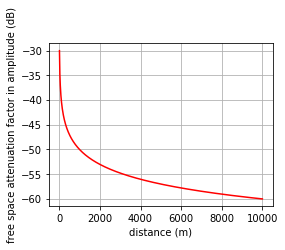

In [9]:
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(4,3))
    d = np.linspace(0, 10e3, 1e3+1)
    Ls = 10*np.log10(3e8/(4*np.pi*d*2400e6))
    print(np.max(d), np.min(Ls))
    plt.plot(d, Ls, color='r',linewidth=1.5)
    plt.xlabel('distance (m)')
    plt.ylabel('free space attenuation factor in amplitude (dB)')
    plt.grid(True)
    plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


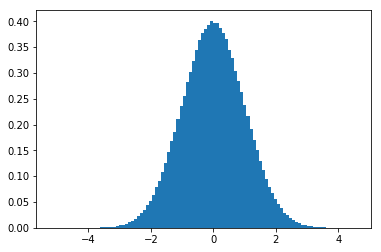

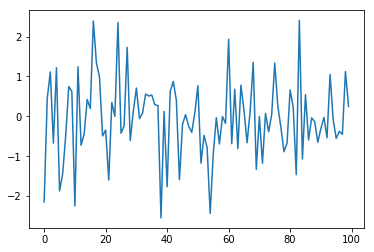

In [26]:
noise = np.random.normal(0,1,1000000)

plt.hist(noise, 100, normed=True)
plt.show()

plt.plot(np.random.randn(100))
plt.show()

## 4. AWGN vector channel

The mathmatical model for the AWGN
vector channel model is $$\boldsymbol{r}=\boldsymbol{s}+\boldsymbol{n},$$
where all vectors are $N$-dimentional vectors. The noise component $n_j,1\leq j\leq N$ obeys Gaussian distribution:

$$p(n_j) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}e^{ - \frac{ (n_j - \mu)^2 } {2 \sigma^2} },$$
i.e., $$n_j\sim\mathcal N(\mu,\sigma).$$

The signal is in the form of
$$s =A\text{sin}(\omega_ct+\theta),$$
then, the power of signal is $$P_s=\frac{1}{2}A^2.$$
The power of noises is $$P_n=\frac{1}{N}\sum_{j=1}^{N}n_j^2$$

The signal to niose ratio (SNR) is
$$\text{SNR}=\frac{P_s}{P_n}=\frac{1}{2}A^2\big/\frac{1}{N}\sum_{j=1}^{N}n_j^2$$

In [32]:
x =[1,2,3]
print(x[::1])

[1, 2, 3]
